<a href="https://colab.research.google.com/github/woodRock/fishy-business/blob/main/code/literature-review/Literature_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

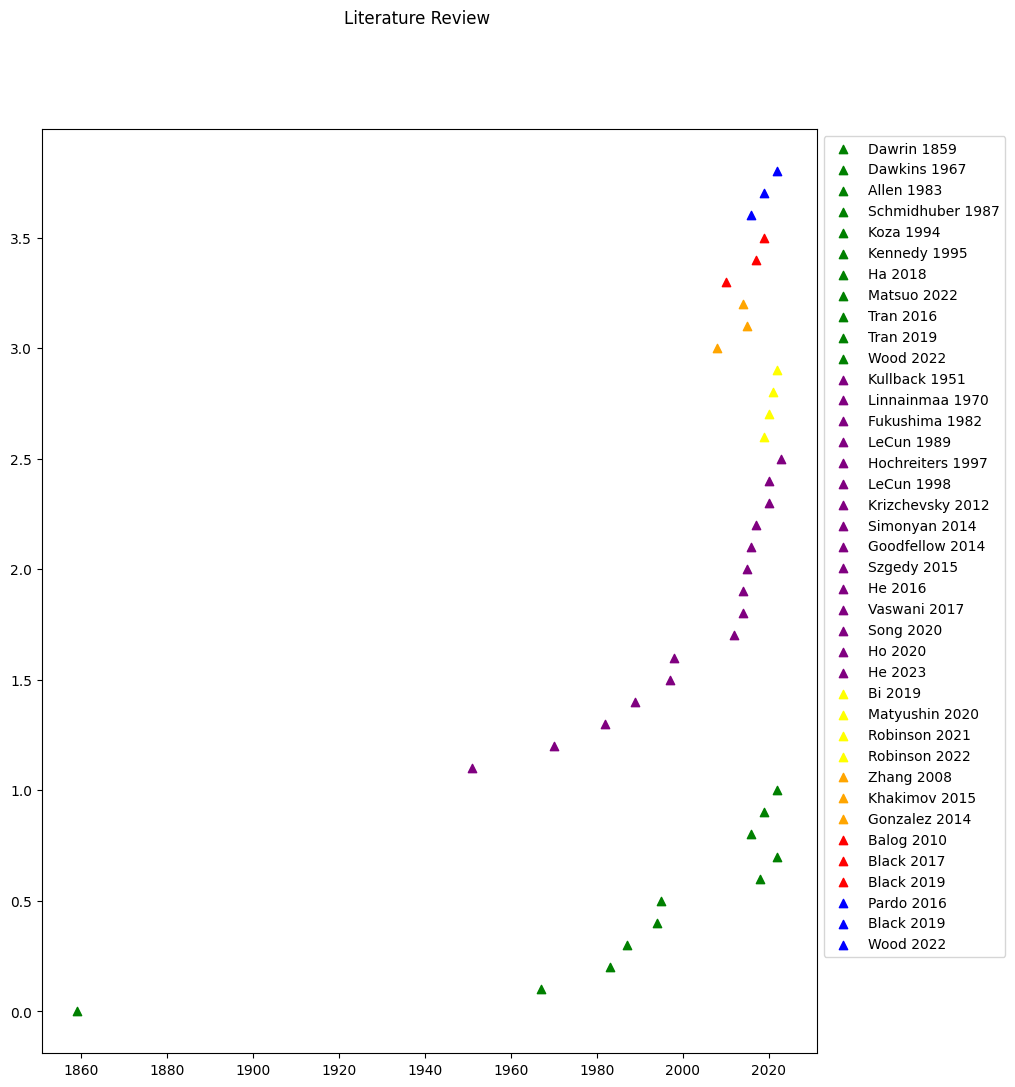

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

colors = {
    "GP":    'green',
    "DL":    'purple',
    "chem":  'yellow',
    "DIMS":  'orange',
    "REIMS": 'red',
    "fish":  'blue',
}

papers = {
    "GP":    ['Dawrin 1859', 'Dawkins 1967', 'Allen 1983',
             'Schmidhuber 1987', 'Koza 1994', 'Kennedy 1995',
             'Ha 2018', 'Matsuo 2022', 'Tran 2016', 'Tran 2019',
             'Wood 2022'],
    "DL":    ['Kullback 1951','Linnainmaa 1970', 'Fukushima 1982',
              'LeCun 1989', 'Hochreiters 1997', 'LeCun 1998',
              'Krizchevsky 2012', 'Simonyan 2014', 'Goodfellow 2014',
              'Szgedy 2015', 'He 2016', 'Vaswani 2017',
              'Song 2020', 'Ho 2020', 'He 2023'],
    "chem":  ['Bi 2019', 'Matyushin 2020', 'Robinson 2021',
              'Robinson 2022'],
    "DIMS":  ['Zhang 2008', 'Khakimov 2015', 'Gonzalez 2014'],
    "REIMS": ['Balog 2010','Black 2017', 'Black 2019'],
    "fish":  ['Pardo 2016', 'Black 2019', 'Wood 2022'],
}

count = 0
fig, ax  = plt.subplots()
for subject, ps in papers.items():
    for p in ps:
        [author, date] = p.split(" ")
        label = author + " " + date
        date = pd.to_datetime(date)
        min, max = 0, 1
        ax.scatter([date], count, label=label, c=colors[subject], marker='^')
        count += 0.1
# Resize to allow legend to fit.
fig.set_figheight(12)
fig.set_figwidth(10)
# Move key outside of the plot.
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.suptitle("Literature Review")
plt.show()

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 15 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from IPython.core.display import display, HTML

graph = nx.Graph()
pos = {}
x = 0
y = 0
color_map = {}

for subject, ps in papers.items():
    for p in ps:
        pos[p] = (x,y)
        color_map[p] = colors[subject]
        for p_other in ps:
            if p_other == p:
                continue
            graph.add_edge(p, p_other)
        y += 100
        x += 100
        count += 1
    y += 1000
    x += 1000

# Custom edges
custom = [
    ["Wood 2022", "Black 2019"],
    ["Wood 2022", "Black 2017"],
    ["Wood 2022",'Bi 2019'],
    ["Wood 2022",'Matyushin 2020'],
    ["Wood 2022", "Robinson 2021"],
    ["Wood 2022", "Robinson 2022"],
    ["Wood 2022", "Black 2017"],
    ["Wood 2022",'Bi 2019'],
    ["Wood 2022",'Matyushin 2020'],

    ["Gonzalez 2014", "Black 2019"],
    ["Gonzalez 2014", "Black 2017"],
    ["Gonzalez 2014",'Balog 2019'],

    ["Khakimov 2015", "Black 2019"],
    ["Khakimov 2015", "Black 2017"],
    ["Khakimov 2015",'Balog 2019'],

    ["Zhang 2008", "Black 2019"],
    ["Zhang 2008", "Black 2017"],
    ["Zhang 2008",'Balog 2019'],

    ["Wood 2023", "Black 2019"],
    ["Wood 2023", "Black 2017"],
    ["Wood 2023",'Bi 2019'],
    ["Wood 2023",'Matyushin 2020'],
    ["Wood 2023", "Robinson 2021"],
    ["Wood 2023", "Robinson 2022"],
    ["Wood 2023", "Black 2017"],
    ["Wood 2023",'Bi 2019'],
    ["Wood 2023",'Matyushin 2020'],
    ["Wood 2023", "Song 2020"],
    ["Wood 2023", "Ho 2020"],
    ["Wood 2023",'Kullback 1951'],
    ["Wood 2023",'LeCun 1989'],
    ["Wood 2023",'LeCun 1998'],
    ["Wood 2023", "Goodfellow 2014"],
    ["Wood 2023", "Vaswani 2017"],
    ["Wood 2023", "Szgedy 2015"],
    ["Wood 2023",'Hochreiters 1997'],
]

for p, other in custom:
    graph.add_edge(p, other)

print(f"pos: {len(pos)}, color_map: {len(color_map)}")
print(f"{color_map}")
print(f"pos: {pos}")

color_map = color_map.values()
options = {
    "node_color" : color_map,
    "node_size" : 200,
    "width": 1
}

g = Network(height="100vh", width="100vw", notebook=True)
g.from_nx(graph)
g.show_buttons(filter_=["physics"])
g.show('network.html')
g.save_graph("network.html")

pos: 37, color_map: 37
{'Dawrin 1859': 'green', 'Dawkins 1967': 'green', 'Allen 1983': 'green', 'Schmidhuber 1987': 'green', 'Koza 1994': 'green', 'Kennedy 1995': 'green', 'Ha 2018': 'green', 'Matsuo 2022': 'green', 'Tran 2016': 'green', 'Tran 2019': 'green', 'Wood 2022': 'blue', 'Kullback 1951': 'purple', 'Linnainmaa 1970': 'purple', 'Fukushima 1982': 'purple', 'LeCun 1989': 'purple', 'Hochreiters 1997': 'purple', 'LeCun 1998': 'purple', 'Krizchevsky 2012': 'purple', 'Simonyan 2014': 'purple', 'Goodfellow 2014': 'purple', 'Szgedy 2015': 'purple', 'He 2016': 'purple', 'Vaswani 2017': 'purple', 'Song 2020': 'purple', 'Ho 2020': 'purple', 'He 2023': 'purple', 'Bi 2019': 'yellow', 'Matyushin 2020': 'yellow', 'Robinson 2021': 'yellow', 'Robinson 2022': 'yellow', 'Zhang 2008': 'orange', 'Khakimov 2015': 'orange', 'Gonzalez 2014': 'orange', 'Balog 2010': 'red', 'Black 2017': 'red', 'Black 2019': 'blue', 'Pardo 2016': 'blue'}
pos: {'Dawrin 1859': (0, 0), 'Dawkins 1967': (100, 100), 'Allen 198